Message schema {

   **datetime** timestamp; // ISO 8601 format in UTC

   **float** FM; // flow metering  (cc per minute: ccm) 유량 츨정


   **float** NOX; // nitrogen oxide (parts per million: ppm) 질소 산화물
   
   **float** O2; // oxygen (ppm)

   **float** temp; // air temperature (F’)
   
}

##1. csv 데이터를 가져오기 및 데이터를 메모리로 불러오기.
 - 데이터의 수는 1000개 이상이어야 한다
 - descriptive statistics 및 histogram을 적용하여 데이터셋의 정보를 파악해야 한다.
 - 값이 없는 경우(Nan, Null), 전후 값의 평균치를 넣는다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/sample_data/factory_air_pollution_dataset.csv")

In [3]:
df

,timestamp,FM,NOX,O2,temp
0,2022-03-01 00:00:00+00:00,2050.36,36.75,5.60,98.38
1,2022-03-01 00:05:00+00:00,2038.29,36.65,5.64,98.30
2,2022-03-01 00:10:00+00:00,2051.85,36.27,5.60,98.28
3,2022-03-01 00:15:00+00:00,2043.45,36.51,5.64,98.29
4,2022-03-01 00:20:00+00:00,2071.23,36.68,5.61,98.30
...,...,...,...,...,...
8921,2022-03-31 23:35:00+00:00,1788.09,38.38,5.89,91.50
8922,2022-03-31 23:40:00+00:00,1763.63,38.34,5.88,91.47
8923,2022-03-31 23:45:00+00:00,1762.03,38.65,5.99,91.45
8924,2022-03-31 23:50:00+00:00,1826.19,39.04,6.06,91.50


In [4]:
descriptive_stats=df.describe()
descriptive_stats

,FM,NOX,O2,temp
count,8926.000000,8922.000000,8926.000000,8860.000000
mean,1543.517650,35.579015,8.576594,91.462454
std,589.796767,11.413413,3.870188,14.176795
min,5.750000,0.000000,0.090000,28.490000
25%,1264.572500,35.662500,6.140000,91.420000
50%,1745.960000,38.330000,7.280000,94.500000
75%,1891.577500,40.430000,9.510000,98.580000
max,4793.210000,401.430000,20.830000,106.580000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8926 non-null   object 
 1   FM         8926 non-null   float64
 2   NOX        8922 non-null   float64
 3   O2         8926 non-null   float64
 4   temp       8860 non-null   float64
dtypes: float64(4), object(1)
memory usage: 348.8+ KB


In [6]:
df.isnull().value_counts()

timestamp  FM     NOX    O2     temp 
False      False  False  False  False    8856
                                True       66
                  True   False  False       4
dtype: int64

In [7]:
df.isnull().sum()

timestamp     0
FM            0
NOX           4
O2            0
temp         66
dtype: int64

In [8]:
for col in df.columns:
    for idx, value in enumerate(df[col]):
        # 값이 누락 확인
        if pd.isnull(value):
            #  이전 값과 다음 값의 평균
            before_value = df.at[idx - 1, col] if idx - 1 >= 0 else np.nan
            after_value = df.at[idx + 1, col] if idx + 1 < len(df) else np.nan
            avg_value = np.nanmean([before_value, after_value])
            # 누락된 값을 평균 값으로 대체합니다.
            df.at[idx, col] = avg_value

In [9]:
df.isnull().sum()

timestamp    0
FM           0
NOX          0
O2           0
temp         0
dtype: int64

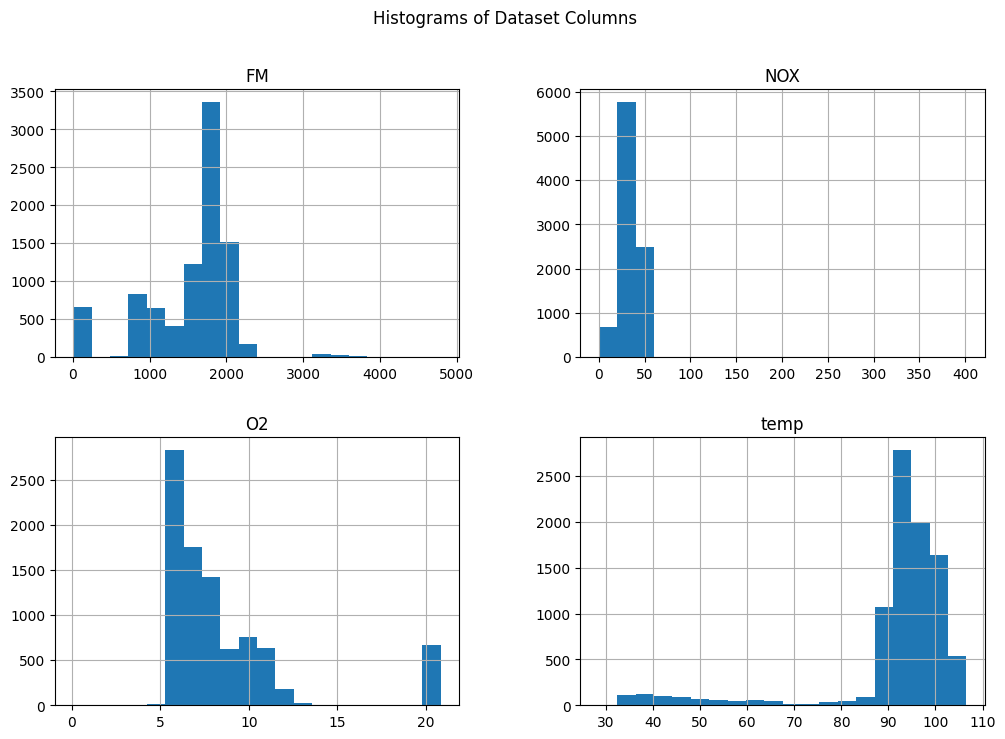

Descriptive Statistics:
                FM          NOX           O2         temp
count  8926.000000  8922.000000  8926.000000  8860.000000
mean   1543.517650    35.579015     8.576594    91.462454
std     589.796767    11.413413     3.870188    14.176795
min       5.750000     0.000000     0.090000    28.490000
25%    1264.572500    35.662500     6.140000    91.420000
50%    1745.960000    38.330000     7.280000    94.500000
75%    1891.577500    40.430000     9.510000    98.580000
max    4793.210000   401.430000    20.830000   106.580000


In [10]:
df.hist(bins=20, figsize=(12, 8))
plt.suptitle("Histograms of Dataset Columns")
plt.show()
print("Descriptive Statistics:")
print(descriptive_stats)

## 2. Datatime의 period 기능을 사용하여 주어진 데이터를 7일단위로 그룹화한다.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926 entries, 0 to 8925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8926 non-null   object 
 1   FM         8926 non-null   float64
 2   NOX        8926 non-null   float64
 3   O2         8926 non-null   float64
 4   temp       8926 non-null   float64
dtypes: float64(4), object(1)
memory usage: 348.8+ KB


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp']

0      2022-03-01 00:00:00+00:00
1      2022-03-01 00:05:00+00:00
2      2022-03-01 00:10:00+00:00
3      2022-03-01 00:15:00+00:00
4      2022-03-01 00:20:00+00:00
                  ...           
8921   2022-03-31 23:35:00+00:00
8922   2022-03-31 23:40:00+00:00
8923   2022-03-31 23:45:00+00:00
8924   2022-03-31 23:50:00+00:00
8925   2022-03-31 23:55:00+00:00
Name: timestamp, Length: 8926, dtype: datetime64[ns, UTC]

In [13]:
# 'timestamp' 열을 7일 간격의 period로 변환하여 새로운 열 'week_period'에 저장
df['week_period'] = df['timestamp'].dt.to_period('W')

<ipython-input-13-ab6270faba09>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['week_period'] = df['timestamp'].dt.to_period('W')


In [14]:
df[['timestamp', 'week_period']]

,timestamp,week_period
0,2022-03-01 00:00:00+00:00,2022-02-28/2022-03-06
1,2022-03-01 00:05:00+00:00,2022-02-28/2022-03-06
2,2022-03-01 00:10:00+00:00,2022-02-28/2022-03-06
3,2022-03-01 00:15:00+00:00,2022-02-28/2022-03-06
4,2022-03-01 00:20:00+00:00,2022-02-28/2022-03-06
...,...,...
8921,2022-03-31 23:35:00+00:00,2022-03-28/2022-04-03
8922,2022-03-31 23:40:00+00:00,2022-03-28/2022-04-03
8923,2022-03-31 23:45:00+00:00,2022-03-28/2022-04-03
8924,2022-03-31 23:50:00+00:00,2022-03-28/2022-04-03


## 3. 특정 컬럼(columns)에 대해 10개, 100개, 1000개 bins을 나누고 Probability Mass function(PMF)를 구하여라
 - pd_Series.value_counts(normalize=True, bins=10)를 사용하면 구성할 수 있다.


In [15]:
selected_columns = ['FM', 'NOX', 'O2', 'temp']

In [16]:
bins = [10, 100, 1000]

# 컬럼 반복
for col in selected_columns:
    print(f"\nColumn: {col}")
    for bin_count in bins:
        # PMF 계산
        pmf = df[col].value_counts(normalize=True, bins=bin_count, sort=False)
        print(f"\nBins: {bin_count}")
        print(pmf)
        print("--"*9)


Column: FM

Bins: 10
(0.962, 484.496]        0.073493
(484.496, 963.242]      0.094891
(963.242, 1441.988]     0.117522
(1441.988, 1920.734]    0.513780
(1920.734, 2399.48]     0.188998
(2399.48, 2878.226]     0.001344
(2878.226, 3356.972]    0.004033
(3356.972, 3835.718]    0.004817
(3835.718, 4314.464]    0.001008
(4314.464, 4793.21]     0.000112
Name: FM, dtype: float64
------------------

Bins: 100
(0.962, 53.625]         0.073269
(53.625, 101.499]       0.000112
(101.499, 149.374]      0.000000
(149.374, 197.248]      0.000000
(197.248, 245.123]      0.000000
                          ...   
(4553.837, 4601.712]    0.000000
(4601.712, 4649.586]    0.000000
(4649.586, 4697.461]    0.000000
(4697.461, 4745.335]    0.000000
(4745.335, 4793.21]     0.000112
Name: FM, Length: 100, dtype: float64
------------------

Bins: 1000
(0.962, 10.537]         0.049742
(10.537, 15.325]        0.014564
(15.325, 20.112]        0.008851
(20.112, 24.9]          0.000000
(24.9, 29.687]          0.000


## 4. 세 개의 임의 컬럼 x, y, z이 PMF px, py, pz로 변환되었다고 가정하다. 이때 결합분포(Joint distribution) pxyz를 구하여라.
 - 중첩 for-loop를 사용하여 구하시오.
 - chaintools나 itertools 라이브러리를 사용하여 pxyz를 구하시오.


In [17]:
df

,timestamp,FM,NOX,O2,temp,week_period
0,2022-03-01 00:00:00+00:00,2050.36,36.75,5.60,98.38,2022-02-28/2022-03-06
1,2022-03-01 00:05:00+00:00,2038.29,36.65,5.64,98.30,2022-02-28/2022-03-06
2,2022-03-01 00:10:00+00:00,2051.85,36.27,5.60,98.28,2022-02-28/2022-03-06
3,2022-03-01 00:15:00+00:00,2043.45,36.51,5.64,98.29,2022-02-28/2022-03-06
4,2022-03-01 00:20:00+00:00,2071.23,36.68,5.61,98.30,2022-02-28/2022-03-06
...,...,...,...,...,...,...
8921,2022-03-31 23:35:00+00:00,1788.09,38.38,5.89,91.50,2022-03-28/2022-04-03
8922,2022-03-31 23:40:00+00:00,1763.63,38.34,5.88,91.47,2022-03-28/2022-04-03
8923,2022-03-31 23:45:00+00:00,1762.03,38.65,5.99,91.45,2022-03-28/2022-04-03
8924,2022-03-31 23:50:00+00:00,1826.19,39.04,6.06,91.50,2022-03-28/2022-04-03


In [18]:
import itertools
columns = ['FM', 'NOX', 'O2']
select_df = df[columns]

In [19]:
def calculate_pmf(column):
    pmf = column.value_counts(normalize=True).sort_index()
    return pmf

In [20]:
px = calculate_pmf(select_df['FM'])
py = calculate_pmf(select_df['NOX'])
pz = calculate_pmf(select_df['O2'])

# PMFs
print("PMF for FM:")
print(px)

print("\nPMF for NOX:")
print(py)

print("\nPMF for O2:")
print(pz)

PMF for FM:
5.75       0.000112
5.95       0.000112
6.03       0.000112
6.22       0.000112
6.27       0.000112
             ...   
4243.26    0.000112
4257.15    0.000112
4271.04    0.000112
4287.20    0.000112
4793.21    0.000112
Name: FM, Length: 8355, dtype: float64

PMF for NOX:
0.00      0.055120
0.06      0.000224
0.08      0.000224
0.23      0.000112
0.44      0.000112
            ...   
76.11     0.000112
88.94     0.000112
98.70     0.000112
149.73    0.000112
401.43    0.000112
Name: NOX, Length: 2015, dtype: float64

PMF for O2:
0.09     0.000112
0.15     0.000112
3.87     0.000112
4.95     0.000224
5.02     0.000112
           ...   
20.79    0.021174
20.80    0.005490
20.81    0.008066
20.82    0.011651
20.83    0.003361
Name: O2, Length: 744, dtype: float64


In [24]:
def calculate_joint_distribution_original(px, py, pz):
    pxyz = {}
    for values in itertools.product(px.index, py.index, pz.index):
        pxyz[values] = px[values[0]] * py[values[1]] * pz[values[2]]
    return pxyz

In [ ]:
pxyz = calculate_joint_distribution_original(px, py, pz)

# Print joint distribution
print("\nJoint Distribution pxyz:")
print(pxyz)

##5. px의 누적함수분포(CDF) cx를 구하시오
 - itertools의 acculmulate 함수를 이용하여 cx를 계산하시오. (이때, pmf는 오름차 순으로 이미 정렬되어 있어야 한다

In [21]:
from itertools import accumulate

# px가 이미 오름차순으로 정렬되어 있다고 가정합니다.
sorted_px = px.sort_index()

# itertools의 accumulate 함수를 사용하여 CDF cx 계산
cdf_x = list(accumulate(sorted_px))

print("\n누적 기능 분포 (CDF) cx:")
print(cdf_x)


누적 기능 분포 (CDF) cx:
[0.00011203226529240422, 0.00022406453058480843, 0.00033609679587721263, 0.00044812906116961686, 0.000560161326462021, 0.0006721935917544253, 0.0008962581223392337, 0.0012323549182164464, 0.0013443871835088505, 0.001568451714093659, 0.0017925162446784674, 0.0019045485099708716, 0.002016580775263276, 0.002240645305848084, 0.0023526775711404883, 0.0024647098364328924, 0.0025767421017252965, 0.0028008066323101048, 0.002912838897602509, 0.003024871162894913, 0.003136903428187317, 0.0032489356934797212, 0.0033609679587721254, 0.003697064754649338, 0.0038090970199417423, 0.003921129285234147, 0.004033161550526551, 0.004145193815818955, 0.004257226081111359, 0.004369258346403763, 0.004481290611696167, 0.004705355142280976, 0.00481738740757338, 0.005041451938158188, 0.005265516468742996, 0.0053775487340354, 0.0054895809993278045, 0.005601613264620209, 0.005713645529912613, 0.005825677795205017, 0.005937710060497421, 0.006049742325789825, 0.006273806856374633, 0.006385839121

## 6. 현재 데이터셋의 특정 컬럼의 평균과 분산을 계산하고, 이로부터 Gaussian distribution(=Normal distribution)을 사용하여 데이터를 재생성해보시오

In [22]:
selected_columns = ['FM', 'NOX', 'O2']
selected_df = df[selected_columns]

# 평균과 분산
mean_values = selected_df.mean()
variance_values = selected_df.var()

# 정규 분포로 데이터를 재생성
num_samples = len(df)
recreated_data = pd.DataFrame()

for col in selected_columns:
    # 정규 분포에서 무작위 샘플
    recreated_data[col] = np.random.normal(loc=mean_values[col], scale=np.sqrt(variance_values[col]), size=num_samples)


In [23]:
print("Mean Values:")
print(mean_values)
print("\nVariance Values:")
print(variance_values)

print("\nRecreated Data:")
print(recreated_data.head())

Mean Values:
FM     1543.517650
NOX      35.579901
O2        8.576594
dtype: float64

Variance Values:
FM     347860.226695
NOX       130.209372
O2         14.978356
dtype: float64

Recreated Data:
            FM        NOX         O2
0  1495.055590  36.004714   8.751838
1   888.070941  33.293831  14.356000
2   697.850325  32.980668  10.838791
3  1237.840310  52.453880   3.613802
4  2584.011782  44.284392   3.512820
